## Packages

### Regular

In [2]:
# load the important libraries
import numpy as np
import pandas as pd

In [3]:
import warnings
warnings.filterwarnings('ignore')

### Visualization

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### ML

In [5]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, recall_score, classification_report
from sklearn.metrics import roc_auc_score, roc_curve

from sklearn.neighbors import KNeighborsClassifier

import pickle

## 1. Business and Data understanding

### Business

Customer churn in banking is when a customer closes their account and switches to another bank. Over their customer lifetime, customers generate fees on transactions, banking fees, credit cards, home loans, and personal loans. Churn is a problem, because the bank loses revenue, and it costs more to acquire a new customer than retaining an existing one.

**Objective(s):** Minimize the customer churn.

**Constraints:** Maximize revenue from existing customer and quality of bank services.

**Success Criteria**

- **Business Success Criteria**: understanding what keeps customers engaged is extremely valuable knowledge, as it can help you to develop your retention strategies. Reduce retention by 20%-30%

<!-- - **ML Success Criteria**: Achieve Silhoutte coefficient of atleast 0.6 -->

- **Economic Success Criteria**: bank can save 20% on marketing budget to acquire new customers.

**Proposed Plan:**
Classification of customer Churn

### Data Understanding

Data: 
   The customer details are obtained from the Bank and is publicly available.

Data Dictionary:
- Dataset contains 10000 customer details
- 18 features are recorded for each customer

- RowNumber —- corresponds to the record (row) number and has no effect on the output.
- CustomerId —- contains random values and has no effect on customer leaving the bank.
- Surname —- the surname of a customer has no impact on their decision to leave the bank.
- CreditScore —- can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.
- Geography —- a customer’s location can affect their decision to leave the bank.
- Gender —- it’s interesting to explore whether gender plays a role in a customer leaving the bank.
- Age —- this is certainly relevant, since older customers are less likely to leave their bank than younger ones.
- Tenure —- refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.
- Balance —- also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.
- NumOfProducts -— refers to the number of products that a customer has purchased through the bank.
- HasCrCard —- denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.
- IsActiveMember -— active customers are less likely to leave the bank.
- EstimatedSalary -— as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.
- Exited —- whether or not the customer left the bank.

In [6]:
df = pd.read_csv('../../../../01_data/Customer-Churn-Records.csv')

df.shape

(10000, 18)

## 2. Data Preparation

### Exploratory Data Analysis / Overview, Descriptive Statistics

#### Overview

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [9]:
df[['CustomerId', 'Surname', 'RowNumber']].nunique()

CustomerId    10000
Surname        2932
RowNumber     10000
dtype: int64

In [10]:
df[['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Exited', 'Complain', 'Card Type']].nunique()

Geography         3
Gender            2
HasCrCard         2
IsActiveMember    2
Exited            2
Complain          2
Card Type         4
dtype: int64

In [22]:
df['Card Type'].value_counts()

4    2507
2    2502
1    2496
3    2495
Name: Card Type, dtype: int64

In [15]:
df['Card Type'] = df['Card Type'].map({'DIAMOND': 4, 'PLATINUM': 3, 'GOLD': 2, 'SILVER':1})

In [7]:
id_cols = ['CustomerId', 'Surname', 'RowNumber']

nominal_cat_cols = ['Geography', 'Gender']

ordinal_cat_cols = ['Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Complain', 'Card Type', 'Satisfaction Score']

numerical_cols = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

In [48]:
# df[nominal_cat_cols] = df[nominal_cat_cols].astype('category')

# df[ordinal_cat_cols] = df[ordinal_cat_cols].astype('category')

In [8]:
df.Exited = df.Exited.astype('category')
# df['Satisfaction Score'] = df['Satisfaction Score'].astype('category')

In [9]:
df['Exited'].value_counts()/df.shape[0]

0    0.7962
1    0.2038
Name: Exited, dtype: float64

In [38]:
# fig = px.histogram(df[['Satisfaction Score', 'Exited']].astype(str).value_counts().reset_index(name='count').sort_values('Satisfaction Score'), 
#             x='Satisfaction Score', y='count', color='Exited', color_discrete_map={'1': 'red', '0': 'blue'}, barnorm='percent')
# fig.write_html(f"../02_customer_churn_html/figures/bar_satisfaction_score.html")

In [64]:
# fig = px.histogram(df[['Satisfaction Score', 'Exited']].astype(str).value_counts().reset_index(name='count').sort_values('Satisfaction Score'), 
#             x='Satisfaction Score', y='count', color='Exited', color_discrete_map={'1': 'red', '0': 'blue'}, barnorm='percent')
# fig.show()

It seems like churn rate doesn't depends from satisfaction score

In [39]:
# fig = px.histogram(df[['Gender', 'Exited']].value_counts().reset_index(name='count').sort_values('Gender'), 
#             x='Gender', y='count', color='Exited', color_discrete_map={1: 'red', 0: 'blue'}, barnorm='percent')
# fig.write_html(f"../02_customer_churn_html/figures/bar_gender.html")

In [65]:
# fig = px.histogram(df[['Gender', 'Exited']].value_counts().reset_index(name='count').sort_values('Gender'), 
#             x='Gender', y='count', color='Exited', color_discrete_map={1: 'red', 0: 'blue'}, barnorm='percent')
# fig.show()

In [40]:
# fig = px.histogram(df[['Geography', 'Exited']].value_counts().reset_index(name='count').sort_values('Geography'), 
#             x='Geography', y='count', color='Exited', color_discrete_map={1: 'red', 0: 'blue'}, barnorm='percent')

# fig.write_html(f"../02_customer_churn_html/figures/bar_geography.html")

In [66]:
# fig = px.histogram(df[['Geography', 'Exited']].value_counts().reset_index(name='count').sort_values('Geography'), 
#             x='Geography', y='count', color='Exited', color_discrete_map={1: 'red', 0: 'blue'}, barnorm='percent')
# fig.show()

In [45]:
# fig = px.histogram(df[['Tenure', 'Exited']].value_counts().reset_index(name='count').sort_values('Tenure').astype(str), 
#             x='Tenure', y='count', color='Exited', color_discrete_map={'1': 'red', '0': 'blue'}, barnorm='percent')

# fig.write_html(f"../02_customer_churn_html/figures/bar_tenure.html")

In [67]:
# fig = px.histogram(df[['Tenure', 'Exited']].value_counts().reset_index(name='count').sort_values('Tenure').astype(str), 
#             x='Tenure', y='count', color='Exited', color_discrete_map={'1': 'red', '0': 'blue'}, barnorm='percent')
# fig.show()

In [46]:
# fig = px.histogram(df[['NumOfProducts', 'Exited']].astype(str).value_counts().reset_index(name='count').sort_values('NumOfProducts'), 
#             x='NumOfProducts', y='count', color='Exited', color_discrete_map={'1': 'red', '0': 'blue'}, barnorm='percent')
# fig.write_html(f"../02_customer_churn_html/figures/bar_number_of_products.html")

In [68]:
# fig = px.histogram(df[['NumOfProducts', 'Exited']].astype(str).value_counts().reset_index(name='count').sort_values('NumOfProducts'), 
#             x='NumOfProducts', y='count', color='Exited', color_discrete_map={'1': 'red', '0': 'blue'}, barnorm='percent')
# fig.show()

In [48]:
# fig = px.histogram(df[['HasCrCard', 'Exited']].astype(str).value_counts().reset_index(name='count').sort_values('HasCrCard'), 
#             x='HasCrCard', y='count', color='Exited', color_discrete_map={'1': 'red', '0': 'blue'}, barnorm='percent')
# fig.write_html(f"../02_customer_churn_html/figures/bar_has_credit_card.html")

In [69]:
# fig = px.histogram(df[['HasCrCard', 'Exited']].astype(str).value_counts().reset_index(name='count').sort_values('HasCrCard'), 
#             x='HasCrCard', y='count', color='Exited', color_discrete_map={'1': 'red', '0': 'blue'}, barnorm='percent')
# fig.show()

In [50]:
# fig = px.histogram(df[['IsActiveMember', 'Exited']].astype(str).value_counts().reset_index(name='count').sort_values('IsActiveMember'), 
#             x='IsActiveMember', y='count', color='Exited', color_discrete_map={'1': 'red', '0': 'blue'}, barnorm='percent')
# fig.write_html(f"../02_customer_churn_html/figures/bar_is_active_member.html")

In [70]:
# fig = px.histogram(df[['IsActiveMember', 'Exited']].astype(str).value_counts().reset_index(name='count').sort_values('IsActiveMember'), 
#             x='IsActiveMember', y='count', color='Exited', color_discrete_map={'1': 'red', '0': 'blue'}, barnorm='percent')
# fig.show()

In [52]:
# fig = px.histogram(df[['Complain', 'Exited']].astype(str).value_counts().reset_index(name='count').sort_values('Complain'), 
#             x='Complain', y='count', color='Exited', color_discrete_map={'1': 'red', '0': 'blue'}, barnorm='percent')
# fig.write_html(f"../02_customer_churn_html/figures/bar_complain.html")

In [71]:
# fig = px.histogram(df[['Complain', 'Exited']].astype(str).value_counts().reset_index(name='count').sort_values('Complain'), 
#             x='Complain', y='count', color='Exited', color_discrete_map={'1': 'red', '0': 'blue'}, barnorm='percent')
# fig.show()

In [57]:
# fig = px.histogram(df[['Card Type', 'Exited']].astype(str).value_counts().reset_index(name='count').sort_values('Card Type'), 
#             x='Card Type', y='count', color='Exited', color_discrete_map={'1': 'red', '0': 'blue'}, barnorm='percent')
# fig.update_layout(
#     xaxis = dict(
#         tickmode = 'array',
#         tickvals = [1, 2, 3, 4],
#         ticktext = ['SILVER', 'GOLD', 'PLATINUM', 'DIAMOND']
#     )
# )
# fig.write_html(f"../02_customer_churn_html/figures/bar_card_type.html")

In [72]:
# fig = px.histogram(df[['Card Type', 'Exited']].astype(str).value_counts().reset_index(name='count').sort_values('Card Type'), 
#             x='Card Type', y='count', color='Exited', color_discrete_map={'1': 'red', '0': 'blue'}, barnorm='percent')
# fig.update_layout(
#     xaxis = dict(
#         tickmode = 'array',
#         tickvals = [1, 2, 3, 4],
#         ticktext = ['SILVER', 'GOLD', 'PLATINUM', 'DIAMOND']
#     )
# )
# fig.show()

In [20]:
df.isnull().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

#### Descriptive statistics

##### First Moment Business Decision

In [13]:
df[numerical_cols].apply(lambda x: {'mean': x.mean(), 'median': x.median()}, axis=0, result_type='expand')

,CreditScore,Age,Balance,EstimatedSalary
mean,650.5288,38.9218,76485.889288,100090.239881
median,652.0000,37.0000,97198.540000,100193.915000


In [16]:
df[ordinal_cat_cols].apply(lambda x: {'mean': x.mean(), 'median': x.median()}, axis=0, result_type='expand')

,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Complain,Card Type,Satisfaction Score
mean,5.0128,1.5302,0.7055,0.5151,0.2044,2.5013,3.0138
median,5.0000,1.0000,1.0000,1.0000,0.0000,3.0000,3.0000


In [17]:
df[nominal_cat_cols].apply(lambda x: {'mode': x.mode()[0], 'number of unique values': x.nunique()}, axis=0, result_type='expand')

,Geography,Gender
mode,France,Male
number of unique values,3,2


In [18]:
df[ordinal_cat_cols].apply(lambda x: {'mode': x.mode()[0], 'number of unique values': x.nunique()}, axis=0, result_type='expand')

,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Complain,Card Type,Satisfaction Score
mode,2,1,1,1,0,4,3
number of unique values,11,4,2,2,2,4,5


In [35]:
# for column in ordinal_cat_cols:

#     fig = px.pie(df[[column]].value_counts().reset_index(name='count').sort_values(column, ignore_index=True), 
#                  values='count', names=column, title=column)

#     fig.write_html(f"../02_customer_churn_html/figures/pie_{column}.html")

In [59]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Card Type', 'Point Earned'],
      dtype='object')

In [63]:
fig = px.pie(df['Card Type'].map({
    1: "SILVER", 2: "GOLD", 3: "PLATINUM", 4: "DIAMOND"
}).value_counts().reset_index(name='count'), 
                 values='count', names='index', title='Card Type')
fig.show()

In [19]:
for column in ordinal_cat_cols:

    fig = px.pie(df[[column]].value_counts().reset_index(name='count').sort_values(column, ignore_index=True), 
                 values='count', names=column, title=column)
    fig.show()

In [36]:
# for column in nominal_cat_cols:

#     fig = px.pie(df[column].value_counts().reset_index(name='count'), values='count', names='index', title=column)
#     fig.write_html(f"../02_customer_churn_html/figures/pie_{column}.html")

In [20]:
for column in nominal_cat_cols:

    fig = px.pie(df[column].value_counts().reset_index(name='count'), values='count', names='index', title=column)
    fig.show()

##### Second Moment Business Decision

In [21]:
df[numerical_cols].apply(lambda x: {'variance': x.var(), 'std': x.std(), 'range': x.max()-x.min(),
                            'iqr': np.nanpercentile(x, 75) - np.nanpercentile(x, 25)}, axis=0, result_type='expand')

,CreditScore,Age,Balance,EstimatedSalary
variance,9341.860157,109.994084,3.893436e+09,3.307457e+09
std,96.653299,10.487806,6.239741e+04,5.751049e+04
range,500.000000,74.000000,2.508981e+05,1.999809e+05
iqr,134.000000,12.000000,1.276442e+05,9.838614e+04


In [22]:
df[ordinal_cat_cols].apply(lambda x: {'variance': x.var(), 'std': x.std(), 'range': x.max()-x.min(),
                            'iqr': np.nanpercentile(x, 75) - np.nanpercentile(x, 25)}, axis=0, result_type='expand')

,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Complain,Card Type,Satisfaction Score
variance,8.364673,0.338322,0.207791,0.249797,0.162637,1.250723,1.976607
std,2.892174,0.581654,0.455840,0.499797,0.403283,1.118357,1.405919
range,10.000000,3.000000,1.000000,1.000000,1.000000,3.000000,4.000000
iqr,4.000000,1.000000,1.000000,1.000000,0.000000,2.000000,2.000000


##### Third Moment Business Decision

In [23]:
df[numerical_cols].skew()

CreditScore       -0.071607
Age                1.011320
Balance           -0.141109
EstimatedSalary    0.002085
dtype: float64

In [25]:
for column in numerical_cols:

    fig = px.histogram(df, x=column, color='Exited', color_discrete_map={0: 'blue', 1: 'red'}, title=column,
            nbins=int(np.sqrt(len(set(df[column])))), barmode='overlay', histnorm='probability density')
    fig.show()

In [26]:
df[ordinal_cat_cols].skew()

Tenure                0.010991
NumOfProducts         0.745568
HasCrCard            -0.901812
IsActiveMember       -0.060437
Complain              1.466263
Card Type            -0.000896
Satisfaction Score   -0.008936
dtype: float64

In [27]:
for column in ordinal_cat_cols:

    fig = px.histogram(df, x=column, color='Exited', color_discrete_map={0: 'blue', 1: 'red'}, title=column,
            nbins=int(np.sqrt(len(set(df[column])))), barmode='overlay', histnorm='probability density')
    fig.show()

##### Fourht Moment Business Decision

In [28]:
df[numerical_cols].kurt()

CreditScore       -0.425726
Age                1.395347
Balance           -1.489412
EstimatedSalary   -1.181518
dtype: float64

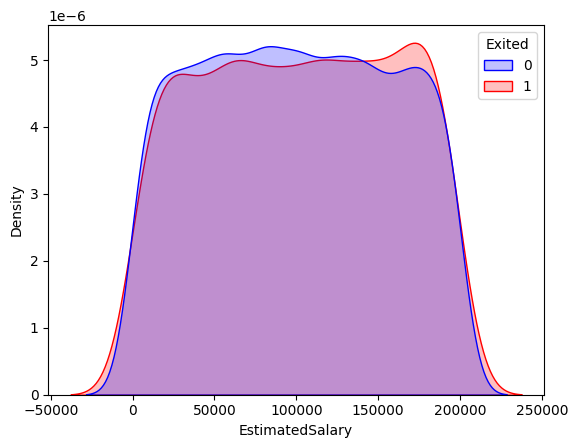

In [31]:
sns.kdeplot(df, x='EstimatedSalary', hue='Exited', palette={0: 'blue', 1: 'red'}, common_norm=False, fill=True)
plt.show()

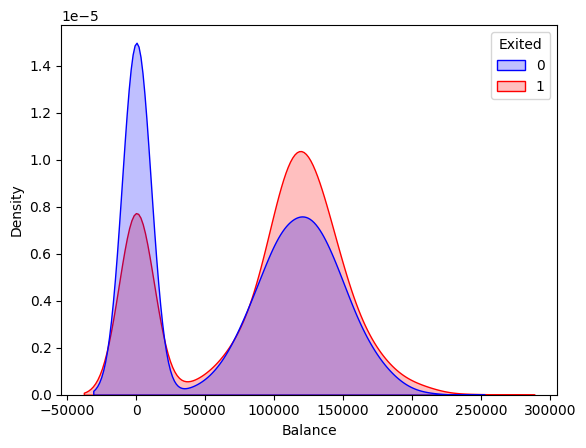

In [32]:
sns.kdeplot(df, x='Balance', hue='Exited', palette={0: 'blue', 1: 'red'}, common_norm=False, fill=True)
plt.show()

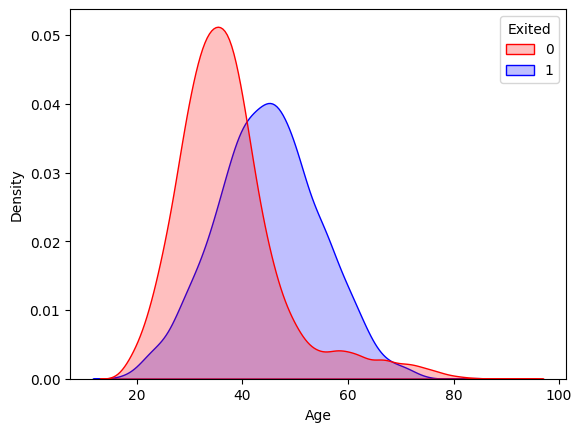

In [33]:
sns.kdeplot(df, x='Age', hue='Exited', palette={0: 'red', 1: 'blue'}, common_norm=False, fill=True)
plt.show()

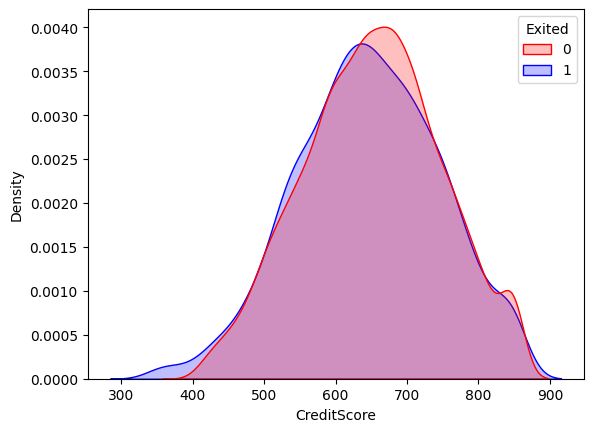

In [34]:
sns.kdeplot(df, x='CreditScore', hue='Exited', palette={0: 'red', 1: 'blue'}, common_norm=False, fill=True)
plt.show()

### Data Preprocessing and Cleaning / 

#### Dropping irrelevant columns

In [40]:
for i in nominal_cat_cols:
    if i != "Exited":
        print(i)
        print(df[[i, 'Exited']].groupby(i).mean())
        print("----------------------------------------")

Geography
             Exited
Geography          
France     0.161747
Germany    0.324432
Spain      0.166734
----------------------------------------
Gender
          Exited
Gender          
Female  0.250715
Male    0.164743
----------------------------------------


In [75]:
# IsActiveMember: We don't have Enough information about this feature
# HasCrCard: Two groups has similar mean / churn rate

In [27]:
feature_drop = ['IsActiveMember', 'HasCrCard']

In [28]:
df.drop(feature_drop, axis=1, inplace=True)

In [29]:
df_processed = df.drop(id_cols, axis = 1)

In [30]:
df_processed.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,79084.10,0,0,5,GOLD,425


### Feature engineering

#### Feature Engineering on Categorical data

In [24]:
LE_Gender = LabelEncoder()
LE_Geography  = LabelEncoder()
LE_Card_Type = LabelEncoder()

In [25]:
df['Gender'] = LE_Gender.fit_transform(df['Gender'])
df['Geography'] = LE_Geography.fit_transform(df['Geography'])
df['Card Type'] = LE_Card_Type.fit_transform(df['Card Type'])

In [26]:
LE_Geography.classes_

array(['France', 'Germany', 'Spain'], dtype=object)

In [27]:
LE_Gender.classes_

array(['Female', 'Male'], dtype=object)

In [28]:
LE_Card_Type.classes_

array(['DIAMOND', 'GOLD', 'PLATINUM', 'SILVER'], dtype=object)

In [94]:
# pickle.dump(LE_Geography, open("LE_Geography.sav", 'wb'))
# pickle.dump(LE_Gender, open("LE_Gender.sav", 'wb'))
# pickle.dump(LE_Card_Type, open("LE_Card_Type.sav", 'wb'))

In [30]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1,1,2,0,464
1,2,15647311,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58,0,1,3,0,456
2,3,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1,1,3,0,377
3,4,15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0,0,5,1,350
4,5,15737888,Mitchell,850,2,0,43,2,125510.82,1,1,1,79084.10,0,0,5,1,425


In [31]:
df = df.drop(id_cols, axis=1)

In [33]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,0,0,42,2,0.00,1,1,1,101348.88,1,1,2,0,464
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0,1,3,0,456
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1,1,3,0,377
3,699,0,0,39,1,0.00,2,0,0,93826.63,0,0,5,1,350
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0,0,5,1,425


In [41]:
df.shape

(10000, 13)

## 3. Model Building

In [34]:
X = df.drop("Exited", axis = 1)

y = df['Exited']

In [35]:
X.shape, y.shape

((10000, 14), (10000,))

In [36]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Card Type,Point Earned
0,619,0,0,42,2,0.00,1,1,1,101348.88,1,2,0,464
1,608,2,0,41,1,83807.86,1,0,1,112542.58,1,3,0,456
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1,3,0,377
3,699,0,0,39,1,0.00,2,0,0,93826.63,0,5,1,350
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0,5,1,425


In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [38]:
X_train.shape, X_test.shape

((8000, 14), (2000, 14))

### Normalizing our data

In [39]:
STD = MinMaxScaler()

In [155]:
# pickle.dump(STD, open("scaler.sav", 'wb'))

In [40]:
X_train_STD = STD.fit_transform(X_train)

In [41]:
X_test_STD = STD.transform(X_test)

### Parameter tuning for models

In [42]:
LR = LogisticRegression()

# defined the set of hyper-parameters
params_lr = {
    'C' : range(1, 5),
    'max_iter' : range(100,500,50)
}

grid_search_lr = GridSearchCV(LR, params_lr, cv=5)

grid_search_lr.fit(X_train_STD, y_train)

In [46]:
grid_search_lr.best_params_

{'C': 1, 'max_iter': 100}

In [ ]:
knn = KNeighborsClassifier()

params_knn = {
    'n_neighbors' : range(1, 5)
}

grid_search_knn = GridSearchCV(knn, params_knn, cv=5)
grid_search_knn.fit(X_train_STD, y_train)

grid_search_knn.best_params_

### Refit the model with best params

In [47]:
LR = grid_search_lr.best_estimator_

# LR = LogisticRegression(C=1 , max_iter = 100)

LR.fit(X_train_STD,y_train)

In [ ]:
knn = grid_search_knn.best_estimator_

# knn = KNeighborsClassifier(n_neighbors = 3)

knn.fit(X_train_STD, y_train)

### Prediction

In [49]:
y_hat_lr = LR.predict(X_test_STD)

y_hat_train_lr = LR.predict(X_train_STD)

In [ ]:
y_hat_knn = knn.predict(X_test_STD)

## Model Evaluation

In [51]:
print(accuracy_score(y_test, y_hat_lr))

0.9985


In [52]:
print(accuracy_score(y_train, y_hat_train_lr))

0.998625


In [53]:
recall_score(y_train, y_hat_train_lr), recall_score(y_test, y_hat_lr)

(0.9987730061349693, 0.9950980392156863)

In [ ]:
print(accuracy_score(y_test,y_hat_knn))

In [133]:
# 1: left the bank, 0: not left

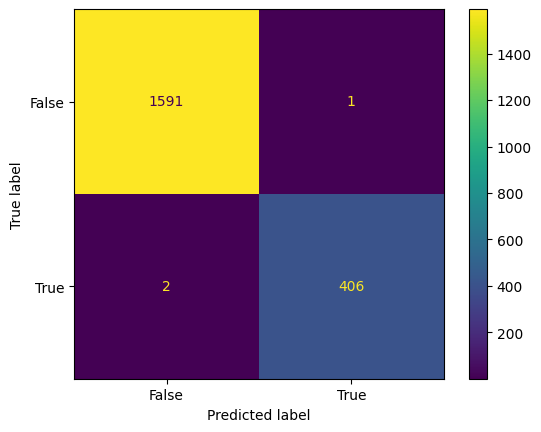

In [54]:
confusion_matrix = confusion_matrix(y_test, y_hat_lr)

cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[False, True])

cm_display.plot()
plt.show()


In [ ]:
confusion_matrix = confusion_matrix(y_test, y_hat_knn)

cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [55]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1592
           1       1.00      1.00      1.00       408

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [56]:
pd.DataFrame({"Feature_names": STD.get_feature_names_out(), "coeff_": LR.coef_.reshape(-1, )})

,Feature_names,coeff_
0,CreditScore,0.030365
1,Geography,-0.028434
2,Gender,-0.077272
3,Age,1.675601
4,Tenure,-0.112201
5,Balance,0.165749
6,NumOfProducts,-0.255082
7,HasCrCard,-0.072103
8,IsActiveMember,-0.680771
9,EstimatedSalary,0.052900


In [57]:
proba = LR.predict_proba(X_test_STD)[:,1]

In [58]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,0,0,42,2,0.00,1,1,1,101348.88,1,1,2,0,464
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0,1,3,0,456
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1,1,3,0,377
3,699,0,0,39,1,0.00,2,0,0,93826.63,0,0,5,1,350
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0,0,5,1,425


## Saving the model in local after model selection

In [112]:
# import pickle
# filename = "Logistic_regression_model.sav"
# pickle.dump(LR, open(filename, 'wb'))

### 1. To convert categorical into numerical : Labelencoder
### 2. to nornalize the data we have used: Min max scaler
### 3. Logistic regression: recall